In [1]:
"""
Demonstrates similarities between pcolor, pcolormesh, imshow and pcolorfast
for drawing quadrilateral grids.

"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df=pd.read_csv('bsf_allscore_heatmap.csv', sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,3380094922,649847635,186934832,67179574,29127544,14025106,7538793,3814458,2122814,1276185,...,0,0,0,0,0,0,0,0,0,0
1,807899979,279399404,109194308,46881134,22257875,11352089,6253656,3416956,1956577,1185751,...,0,0,0,0,0,0,0,0,0,0
2,280345361,132292034,62652284,30583980,15770995,8473748,4824870,2763349,1639279,1013241,...,0,0,0,0,0,0,0,0,0,0
3,118755974,67718240,36446926,19473419,10719356,6069318,3580636,2137396,1312782,834980,...,0,0,0,0,0,0,0,0,0,0
4,58239377,37302460,21930795,12561581,7299756,4322996,2642373,1635560,1039388,678363,...,0,0,0,0,0,0,0,0,0,0


In [101]:
data = np.array(df)
100*np.sum(data[0:10,0:10])/np.sum(data)

98.837777252622885

In [66]:
boundary = 350
padding = 10

# make these smaller to increase the resolution
dx, dy = 1, 1

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-padding, boundary, dy),
                slice(-padding, boundary, dx)]

z = data

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
zz = np.zeros((boundary+padding,boundary+padding))
zz[padding:boundary+padding, padding:boundary+padding] = z[0:boundary, 0:boundary]

zz[zz==0] = -10
zzz

array([[  3.38009492e+09,   6.49847635e+08,   1.86934832e+08, ...,
          7.00000000e+00,   5.00000000e+00,   9.00000000e+00],
       [  8.07899979e+08,   2.79399404e+08,   1.09194308e+08, ...,
          1.70000000e+01,   1.50000000e+01,   1.70000000e+01],
       [  2.80345361e+08,   1.32292034e+08,   6.26522840e+07, ...,
          2.20000000e+01,   2.40000000e+01,   3.10000000e+01],
       ..., 
       [  1.00000000e+00,   8.00000000e+00,   1.50000000e+01, ...,
          1.00000000e+00,   2.00000000e+00,   4.00000000e+00],
       [  2.00000000e+00,   5.00000000e+00,   3.00000000e+00, ...,
          8.00000000e+00,   3.00000000e+00,   1.00000000e+00],
       [  2.00000000e+00,   1.00000000e+00,   1.10000000e+01, ...,
          6.00000000e+00,   2.00000000e+00,   3.00000000e+00]])

/Users/leej324/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


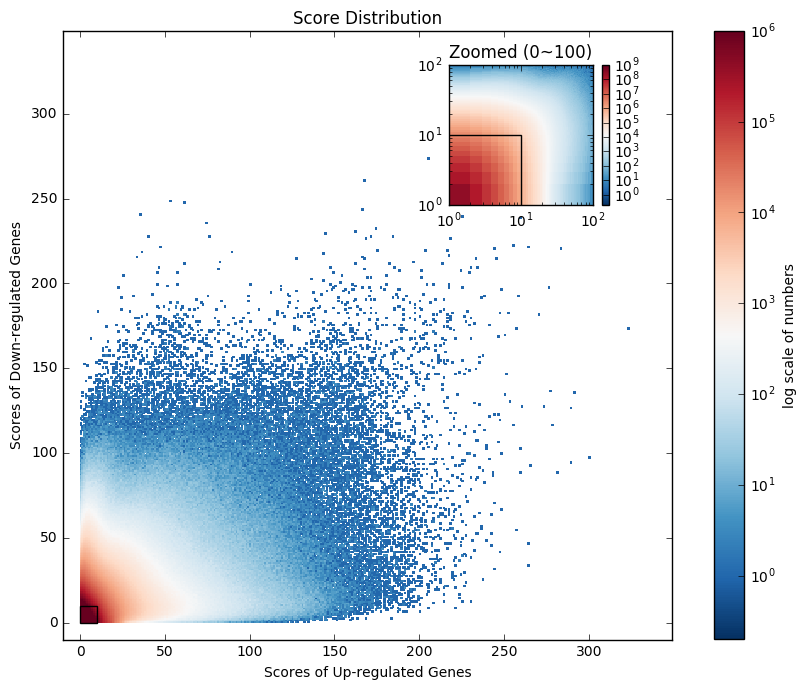

In [106]:
import matplotlib.colors as colors
import matplotlib.patches as patches

z_min, z_max = 0, 1000

plt.close('all')
plt.figure(figsize=(9, 7))
plt.gca().set_aspect('equal')

# plt.pcolormesh(x, y, zz+0.01, cmap='RdBu_r', norm=colors.LogNorm(vmin=0.2, vmax=10e8), label='No.')
plt.pcolormesh(x, y, zz, cmap='RdBu_r', norm=colors.LogNorm(vmin=0.2, vmax=10e5), label='No.')
plt.gca().set_axis_bgcolor('white')
plt.title('Score Distribution')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.gca().add_patch(patches.Rectangle((0, 0),10,10,fill=False))
plt.xlabel('Scores of Up-regulated Genes')
plt.ylabel('Scores of Down-regulated Genes')
plt.colorbar( label='log scale of numbers')

# this is an inset axes over the main axes
xx = x[11:111,11:111]
yy = y[11:111,11:111]
xx[xx==0] = 0.1
yy[yy==0] = 0.1
zzz = zz[11:111,11:111]
a = plt.axes([.55, .7, .2, .2])
a.set_yscale('log')
a.set_xscale('log')
a.add_patch(patches.Rectangle((0, 0),10,10, fill=False))
plt.pcolormesh(xx, yy, zzz, cmap='RdBu_r', norm=colors.LogNorm(vmin=0.2, vmax=10e8), label='No.')
plt.title('Zoomed (0~100)')
plt.colorbar()

plt.tight_layout()
plt.savefig('score_distribution.png')
plt.show()

/Users/leej324/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/Users/leej324/anaconda/lib/python3.4/site-packages/mpl_toolkits/mplot3d/proj3d.py:161: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


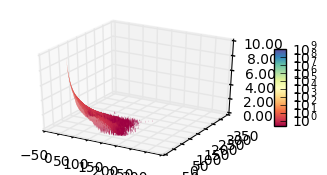

In [172]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.tri as mtri


fig = plt.figure(figsize=(4, 2))
ax = fig.gca(projection='3d')

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(x.flatten(), y.flatten())

# Plot the surface.
surf = ax.plot_trisurf(x.flatten(), y.flatten(), np.log10(zz.flatten()), triangles=tri.triangles,
                       cmap=cm.Spectral, norm=colors.LogNorm(vmin=0.2, vmax=10e8),
                       linewidth=0)#, antialiased=True)

# Customize the z axis.
# ax.set_zlim(-0.1, 10)
# ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=6)

plt.show()